In [1]:
# Required modules
import sqlite3
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt
conn = sqlite3.connect("stocks-eow.db")

In [2]:
df = pd.read_sql("SELECT * FROM eow",conn, parse_dates='date')

DatabaseError: Execution failed on sql 'SELECT * FROM eow': no such table: eow

In [3]:
df.groupby('symbol').count()

,date,company,open,high,low,close,adjclose,volume,volume_adi,volume_obv,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,slogret,sadjclose
symbol,,,,,,,,,,,,,,,,,,,,,
A,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
AAL,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
AAP,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
AAPL,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
ABC,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRAY,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
XRX,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453
YUM,453,453,453,453,453,453,453,453,453,453,...,453,453,453,453,453,453,453,453,453,453


In [4]:
df

,symbol,date,company,open,high,low,close,adjclose,volume,volume_adi,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,slogret,sadjclose
0,A,2011-01-14,A,41.4100,43.4100,41.30,43.26,28.4382,17917600,1.741094e+07,...,-6.224066,0.000000,43.260000,0.000000,3.940413,3.864760,3.940413,0.038648,-0.026944,27.6822
1,A,2011-01-21,A,43.3700,44.4500,41.46,42.11,27.6822,21525200,5.244519e+06,...,-67.826087,0.000000,42.110000,0.000000,-2.658345,-2.694318,1.177319,-0.026944,-0.027200,26.9394
2,A,2011-01-28,A,42.1834,43.5200,40.88,40.98,26.9394,22294000,-1.536054e+07,...,-97.198880,0.000000,40.980000,0.000000,-2.683448,-2.720110,-1.537722,-0.027200,0.047882,28.2607
3,A,2011-02-04,A,41.2100,43.1300,40.23,42.99,28.2607,27637800,9.608781e+06,...,-34.597156,0.000000,42.990000,0.000000,4.904832,4.788339,3.291687,0.047882,0.046140,29.5952
4,A,2011-02-11,A,43.4500,45.1500,42.57,45.02,29.5952,27674300,3.449420e+07,...,-2.642276,0.173408,45.020000,0.000000,4.722028,4.613930,8.169149,0.046140,-0.024736,28.8721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208828,ZION,2019-08-16,ZION,41.3300,42.0106,39.12,40.20,40.2000,12657700,2.776840e+11,...,-87.543253,-2.915506,46.918948,-11.336568,-3.942652,-4.022480,-3.411821,-0.031947,-0.004238,40.0300
208829,ZION,2019-08-23,ZION,40.7700,41.4400,39.90,40.03,40.0300,12143900,2.776739e+11,...,-88.166450,-3.904300,45.826178,-7.058277,-0.422886,-0.423782,-3.820279,-0.004238,0.026136,41.0900
208830,ZION,2019-08-30,ZION,40.3700,41.4500,39.11,41.09,41.0900,10744200,2.776814e+11,...,-74.285714,-4.638168,45.456488,-5.843263,2.648014,2.613561,-1.273426,0.026136,-0.003657,40.9400
208831,ZION,2019-09-06,ZION,40.7800,41.7300,39.65,40.94,40.9400,8758500,2.776835e+11,...,-76.233766,-5.194697,44.558983,-8.778966,-0.365052,-0.365720,-1.633830,-0.003657,0.089431,44.7700


In [5]:
#set symbol as index
df.set_index(keys= "symbol", inplace = True, append=False)
df.head()

,date,company,open,high,low,close,adjclose,volume,volume_adi,volume_obv,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,slogret,sadjclose
symbol,,,,,,,,,,,,,,,,,,,,,
A,2011-01-14,A,41.4100,43.41,41.30,43.26,28.4382,17917600,1.741094e+07,40957700,...,-6.224066,0.000000,43.26,0.0,3.940413,3.864760,3.940413,0.038648,-0.026944,27.6822
A,2011-01-21,A,43.3700,44.45,41.46,42.11,27.6822,21525200,5.244519e+06,19432500,...,-67.826087,0.000000,42.11,0.0,-2.658345,-2.694318,1.177319,-0.026944,-0.027200,26.9394
A,2011-01-28,A,42.1834,43.52,40.88,40.98,26.9394,22294000,-1.536054e+07,-2861500,...,-97.198880,0.000000,40.98,0.0,-2.683448,-2.720110,-1.537722,-0.027200,0.047882,28.2607
A,2011-02-04,A,41.2100,43.13,40.23,42.99,28.2607,27637800,9.608781e+06,24776300,...,-34.597156,0.000000,42.99,0.0,4.904832,4.788339,3.291687,0.047882,0.046140,29.5952
A,2011-02-11,A,43.4500,45.15,42.57,45.02,29.5952,27674300,3.449420e+07,52450600,...,-2.642276,0.173408,45.02,0.0,4.722028,4.613930,8.169149,0.046140,-0.024736,28.8721


In [6]:
#set date as index
df.set_index(keys= "date", inplace = True, append=True)
df.head()

company     open   high    low  close  adjclose    volume  \
symbol date                                                                   
A      2011-01-14       A  41.4100  43.41  41.30  43.26   28.4382  17917600   
       2011-01-21       A  43.3700  44.45  41.46  42.11   27.6822  21525200   
       2011-01-28       A  42.1834  43.52  40.88  40.98   26.9394  22294000   
       2011-02-04       A  41.2100  43.13  40.23  42.99   28.2607  27637800   
       2011-02-11       A  43.4500  45.15  42.57  45.02   29.5952  27674300   

                     volume_adi  volume_obv  volume_cmf  ...  momentum_wr  \
symbol date                                              ...                
A      2011-01-14  1.741094e+07    40957700    0.425096  ...    -6.224066   
       2011-01-21  5.244519e+06    19432500    0.083935  ...   -67.826087   
       2011-01-28 -1.536054e+07    -2861500   -0.181188  ...   -97.198880   
       2011-02-04  9.608781e+06    24776300    0.085476  ...   -34.597156   
       2011-02-11  3.449420e+07    52450600    0.246231  ...    -2.642276   

                   momentum_ao  momentum_kama  momentum_roc  others_dr  \
symbol date                                                              
A      2011-01-14     0.000000          43.26           0.0   3.940413   
       2011-01-21     0.000000          42.11           0.0  -2.658345   
       2011-01-28     0.000000          40.98           0.0  -2.683448   
       2011-02-04     0.000000          42.99           0.0   4.904832   
       2011-02-11     0.173408          45.02           0.0   4.722028   

                   others_dlr  others_cr    logret   slogret  sadjclose  
symbol date                                                              
A      2011-01-14    3.864760   3.940413  0.038648 -0.026944    27.6822  
       2011-01-21   -2.694318   1.177319 -0.026944 -0.027200    26.9394  
       2011-01-28   -2.720110  -1.537722 -0.027200  0.047882    28.2607  
       2011-02-04    4.788339   3.291687  0.047882  0.046140    29.5952  
       2011-02-11    4.613930   8.169149  0.046140 -0.024736    28.8721  

[5 rows x 71 columns]

In [7]:
#swap date and symbol
df.swaplevel()

,,company,open,high,low,close,adjclose,volume,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,slogret,sadjclose
date,symbol,,,,,,,,,,,,,,,,,,,,,
2011-01-14,A,A,41.4100,43.4100,41.30,43.26,28.4382,17917600,1.741094e+07,40957700,0.425096,...,-6.224066,0.000000,43.260000,0.000000,3.940413,3.864760,3.940413,0.038648,-0.026944,27.6822
2011-01-21,A,A,43.3700,44.4500,41.46,42.11,27.6822,21525200,5.244519e+06,19432500,0.083935,...,-67.826087,0.000000,42.110000,0.000000,-2.658345,-2.694318,1.177319,-0.026944,-0.027200,26.9394
2011-01-28,A,A,42.1834,43.5200,40.88,40.98,26.9394,22294000,-1.536054e+07,-2861500,-0.181188,...,-97.198880,0.000000,40.980000,0.000000,-2.683448,-2.720110,-1.537722,-0.027200,0.047882,28.2607
2011-02-04,A,A,41.2100,43.1300,40.23,42.99,28.2607,27637800,9.608781e+06,24776300,0.085476,...,-34.597156,0.000000,42.990000,0.000000,4.904832,4.788339,3.291687,0.047882,0.046140,29.5952
2011-02-11,A,A,43.4500,45.1500,42.57,45.02,29.5952,27674300,3.449420e+07,52450600,0.246231,...,-2.642276,0.173408,45.020000,0.000000,4.722028,4.613930,8.169149,0.046140,-0.024736,28.8721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-16,ZION,ZION,41.3300,42.0106,39.12,40.20,40.2000,12657700,2.776840e+11,244108303781,0.181550,...,-87.543253,-2.915506,46.918948,-11.336568,-3.942652,-4.022480,-3.411821,-0.031947,-0.004238,40.0300
2019-08-23,ZION,ZION,40.7700,41.4400,39.90,40.03,40.0300,12143900,2.776739e+11,244096159881,0.095377,...,-88.166450,-3.904300,45.826178,-7.058277,-0.422886,-0.423782,-3.820279,-0.004238,0.026136,41.0900
2019-08-30,ZION,ZION,40.3700,41.4500,39.11,41.09,41.0900,10744200,2.776814e+11,244106904081,0.105648,...,-74.285714,-4.638168,45.456488,-5.843263,2.648014,2.613561,-1.273426,0.026136,-0.003657,40.9400


In [46]:
#Set stock
stock = df.loc['IBM']
stock

,company,open,high,low,close,adjclose,volume,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,slogret,sadjclose
date,,,,,,,,,,,,,,,,,,,,,
2011-01-14,IBM,147.58,150.0000,146.75,150.00,113.2738,19878500,1.214291e+11,107600979711,0.280528,...,-97.884531,-39.050065,225.917961,-48.497854,1.399310,1.389611,260.403652,0.013896,0.036010,117.4271
2011-01-21,IBM,149.82,156.7800,149.38,155.50,117.4271,35766800,1.214525e+11,107636746511,0.328306,...,-94.421709,-59.622653,203.968740,-44.793553,3.666667,3.601044,273.618453,0.036010,0.023578,120.2287
2011-01-28,IBM,155.42,164.3500,155.33,159.21,120.2287,32502900,1.214479e+11,107669249411,0.278519,...,-92.085878,-78.152535,189.971978,-42.496478,2.385852,2.357835,282.532436,0.023578,0.029643,123.8460
2011-02-04,IBM,159.18,164.2058,158.68,164.00,123.8460,25371100,1.214714e+11,107694620511,0.388215,...,-89.070075,-97.294482,182.723204,-44.204402,3.008605,2.964234,294.041326,0.029643,0.003036,124.2226
2011-02-11,IBM,164.08,166.2500,163.18,163.85,124.2226,26097300,1.214567e+11,107668523211,0.284583,...,-89.164516,-90.545232,177.621996,-44.976157,-0.091463,-0.091505,293.680923,0.003036,0.006023,124.9731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-16,IBM,135.66,136.5700,130.25,133.76,133.7600,20282800,1.215495e+11,107280138811,0.041802,...,-73.524904,8.217526,140.278586,1.118839,-1.740983,-1.756316,221.383950,-0.017563,-0.031826,129.5700
2019-08-23,IBM,134.88,136.3300,128.83,129.57,129.5700,16502700,1.215362e+11,107263636111,-0.007271,...,-89.578544,4.727291,140.046319,2.031656,-3.132476,-3.182587,211.316675,-0.031826,0.044972,135.5300
2019-08-30,IBM,131.05,136.0700,129.16,135.53,135.5300,16207900,1.215499e+11,107279844011,-0.004630,...,-66.743295,0.688144,139.985021,1.665291,4.599830,4.497174,225.636713,0.044972,0.036513,140.5700


In [9]:
#Set graph space
fig_size1 = plt.rcParams["figure.figsize"]
fig_size1[0] = 30
fig_size1[1] = 10
plt.rcParams["figure.figsize"] = fig_size1

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

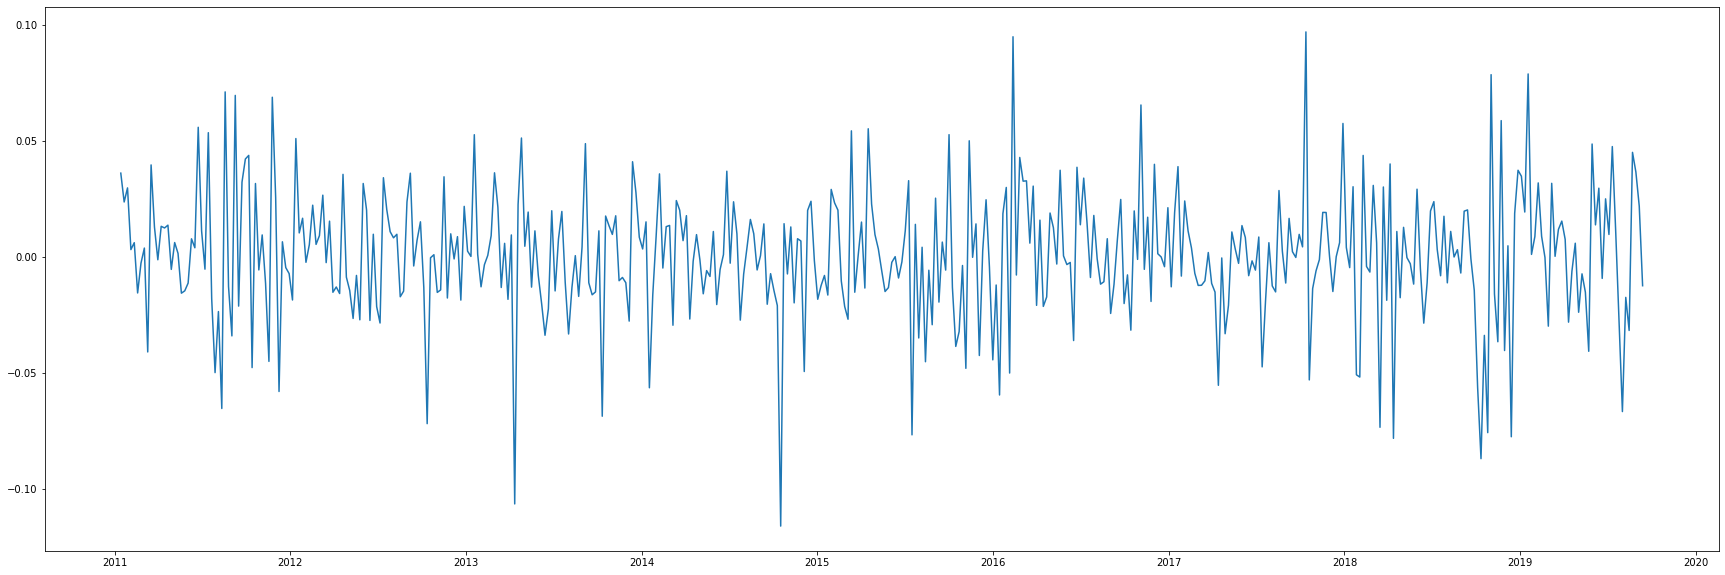

In [11]:
plt.plot(stock['slogret'])
plt.show()

In [12]:
stock.iloc[5,:]

company             IBM
open             164.18
high             164.84
low              162.52
close            164.84
                ...    
others_dlr     0.602393
others_cr        296.06
logret        0.0060234
slogret      -0.0156516
sadjclose       123.032
Name: 2011-02-18 00:00:00, Length: 71, dtype: object

In [66]:
#columnsTitles=["sadjclose","slogret"]
#stock=stock.reindex(columns=columnsTitles)
#stock[list(stock.columns[:-2]).append('sadjclose')]
#stock.columns[-1]
del stock['slogret']

In [67]:
stock.head(5)

,open,high,low,close,adjclose,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,logret,sadjclose
date,,,,,,,,,,,,,,,,,,,,,
2011-01-14,147.58,150.0000,146.75,150.00,113.2738,19878500,1.214291e+11,107600979711,0.280528,-3.617374e+08,...,17.118099,-97.884531,-39.050065,225.917961,-48.497854,1.399310,1.389611,260.403652,0.013896,117.4271
2011-01-21,149.82,156.7800,149.38,155.50,117.4271,35766800,1.214525e+11,107636746511,0.328306,-2.819581e+08,...,2.835317,-94.421709,-59.622653,203.968740,-44.793553,3.666667,3.601044,273.618453,0.036010,120.2287
2011-01-28,155.42,164.3500,155.33,159.21,120.2287,32502900,1.214479e+11,107669249411,0.278519,-2.244519e+08,...,5.202628,-92.085878,-78.152535,189.971978,-42.496478,2.385852,2.357835,282.532436,0.023578,123.8460
2011-02-04,159.18,164.2058,158.68,164.00,123.8460,25371100,1.214714e+11,107694620511,0.388215,-1.750262e+08,...,8.140779,-89.070075,-97.294482,182.723204,-44.204402,3.008605,2.964234,294.041326,0.029643,124.2226
2011-02-11,164.08,166.2500,163.18,163.85,124.2226,26097300,1.214567e+11,107668523211,0.284583,-1.505817e+08,...,9.893177,-89.164516,-90.545232,177.621996,-44.976157,-0.091463,-0.091505,293.680923,0.003036,124.9731


In [47]:
stock_2 = stock
stock = stock.iloc[:, 1:]

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [69]:
df_train, df_test = train_test_split(stock.iloc[:,0:], train_size=0.9165, test_size=0.0835, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(df_train.iloc[:,:])
x_test = min_max_scaler.transform(df_test.iloc[:,:])

Train and Test size 415 38


In [70]:
#lag = np.array(df_train['slogret']).reshape(x_train.shape[0],1)
#lag_test = np.array(df_test['slogret']).reshape(x_test.shape[0],1)

In [71]:
#x_train = np.hstack((x_train, lag))
#x_test = np.hstack((x_test, lag_test))

In [72]:
x_test.shape

(38, 69)

In [73]:
time_steps = 5

In [74]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples is len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - time_steps
    dim_1 = mat.shape[1]-1
    x = np.zeros((dim_0, time_steps, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:time_steps+i, :-1 ]
        y[i] = mat[time_steps+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [75]:
from tqdm import tqdm_notebook

In [76]:
#trim dataset
def trim_dataset(mat, batch_size):
    
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

In [77]:
x_t, y_t = build_timeseries(x_train, x_train.shape[1]-1)
x_t = trim_dataset(x_t, 1)#batch size (139)
y_t = trim_dataset(y_t, 1)#batch size (139)
#x_temp, y_temp = build_timeseries(x_test, 3)
#x_val, x_test_t = np.split(trim_dataset(x_temp, 139),2)
#y_val, y_test_t = np.split(trim_dataset(y_temp, 139),2)


length of time-series i/o (410, 5, 68) (410,)


In [78]:
x_test_t, y_test_t = build_timeseries(x_test, x_train.shape[1]-1)
#x_test_t = trim_dataset(x_test_t, 139)
#y_test_t = trim_dataset(y_test_t, 139)


length of time-series i/o (33, 5, 68) (33,)


In [79]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers

In [80]:
x_t.shape[2]

68

In [174]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(1, time_steps, x_t.shape[2]), dropout=0, recurrent_dropout=0, stateful=True, kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='tanh'))
optimizer = optimizers.RMSprop(learning_rate= 0.0001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

In [175]:
from keras.callbacks import CSVLogger
import os

In [176]:
#csv_logger = CSVLogger(os.path.join("./", 'your_log_name' + '.log'), append=True)

history = lstm_model.fit(x_t, y_t, epochs=20, batch_size=1,
                    shuffle=False, validation_split= 0.2)

Train on 328 samples, validate on 82 samples
Epoch 1/20
328/328 [==============================] - 1s 4ms/step - loss: 0.0149 - val_loss: 0.0181
Epoch 2/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0151 - val_loss: 0.0183
Epoch 3/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0128 - val_loss: 0.0173
Epoch 4/20
328/328 [==============================] - 1s 2ms/step - loss: 0.0115 - val_loss: 0.0164
Epoch 5/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0172
Epoch 6/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0206
Epoch 7/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0108 - val_loss: 0.0147
Epoch 8/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0095 - val_loss: 0.0151
Epoch 9/20
328/328 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0136
Epoch 10/20
328/328 [==============================] - 

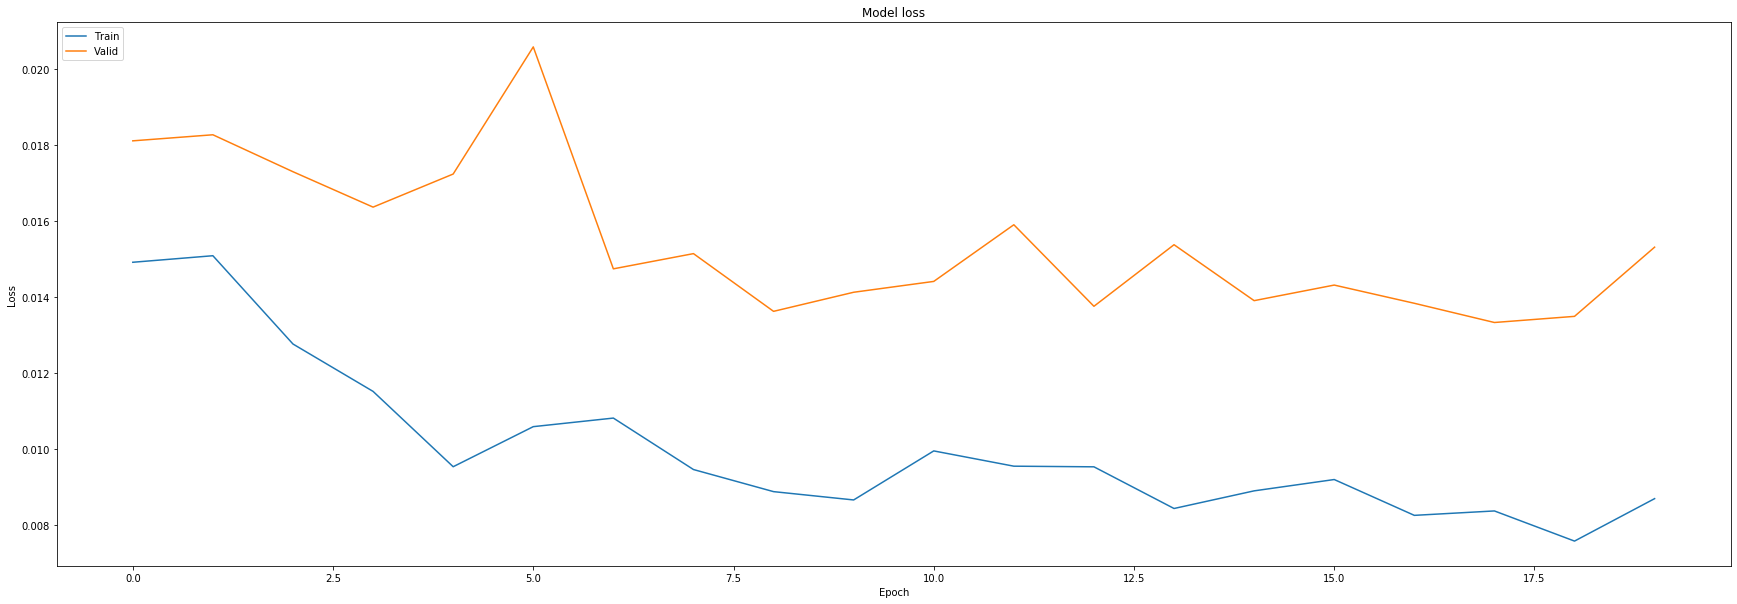

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [178]:
lstm_model.predict(x_test_t,batch_size=1)

array([[0.48837656],
       [0.5185227 ],
       [0.54459023],
       [0.5746607 ],
       [0.5952489 ],
       [0.6071821 ],
       [0.582944  ],
       [0.6384399 ],
       [0.6435107 ],
       [0.66933316],
       [0.71132743],
       [0.73388165],
       [0.6903988 ],
       [0.66999805],
       [0.6548378 ],
       [0.6279485 ],
       [0.58557326],
       [0.55031526],
       [0.5080731 ],
       [0.52346754],
       [0.54297054],
       [0.57365274],
       [0.59269047],
       [0.64295256],
       [0.67639613],
       [0.73919064],
       [0.7639182 ],
       [0.7369001 ],
       [0.6780584 ],
       [0.6149302 ],
       [0.56680924],
       [0.58048266],
       [0.60164773]], dtype=float32)

In [179]:
y_test_t

array([0.4145581 , 0.47969227, 0.49808592, 0.49733264, 0.43536442,
       0.50079959, 0.50110214, 0.52597896, 0.55884859, 0.57498086,
       0.51436947, 0.50095086, 0.51316391, 0.46306759, 0.44781209,
       0.41668828, 0.33598217, 0.43240223, 0.46047432, 0.52226194,
       0.50242964, 0.55552211, 0.57626977, 0.68214908, 0.70778072,
       0.64507619, 0.49989658, 0.46331302, 0.39863576, 0.49063492,
       0.56843287, 0.61628478, 0.58865416])

In [180]:
test_predicted = lstm_model.predict(x_test_t, batch_size = 1)

In [181]:
x_test_t.shape

(33, 5, 68)

In [182]:
x_test

array([[-0.06404959, -0.05719962, -0.04514899, ...,  0.02010002,
         0.63280345,  0.14707054],
       [-0.0286157 , -0.02907038,  0.01254139, ...,  0.06135795,
         0.72002783,  0.20877172],
       [ 0.01446281,  0.01662658,  0.0624551 , ...,  0.1011733 ,
         0.70795877,  0.24394442],
       ...,
       [ 0.15444215,  0.16522012,  0.18781981, ...,  0.23648779,
         0.75625293,  0.56843287],
       [ 0.19369835,  0.22409286,  0.22965787, ...,  0.28495865,
         0.71655851,  0.61628478],
       [ 0.25299587,  0.26341106,  0.30119394, ...,  0.31477207,
         0.6475832 ,  0.58865416]])

In [183]:
np.mean(np.square(y_test_t - test_predicted))

0.022911844413581847

In [184]:
test_predicted

array([[0.5486996 ],
       [0.5382731 ],
       [0.5505226 ],
       [0.5763058 ],
       [0.5957063 ],
       [0.60731846],
       [0.5829885 ],
       [0.63845205],
       [0.643513  ],
       [0.6693327 ],
       [0.7113267 ],
       [0.7338813 ],
       [0.6903985 ],
       [0.6699978 ],
       [0.6548377 ],
       [0.6279485 ],
       [0.58557326],
       [0.55031526],
       [0.5080731 ],
       [0.5234674 ],
       [0.54297054],
       [0.57365274],
       [0.59269047],
       [0.6429525 ],
       [0.67639613],
       [0.73919064],
       [0.7639182 ],
       [0.7369001 ],
       [0.6780584 ],
       [0.6149303 ],
       [0.56680924],
       [0.5804826 ],
       [0.60164773]], dtype=float32)

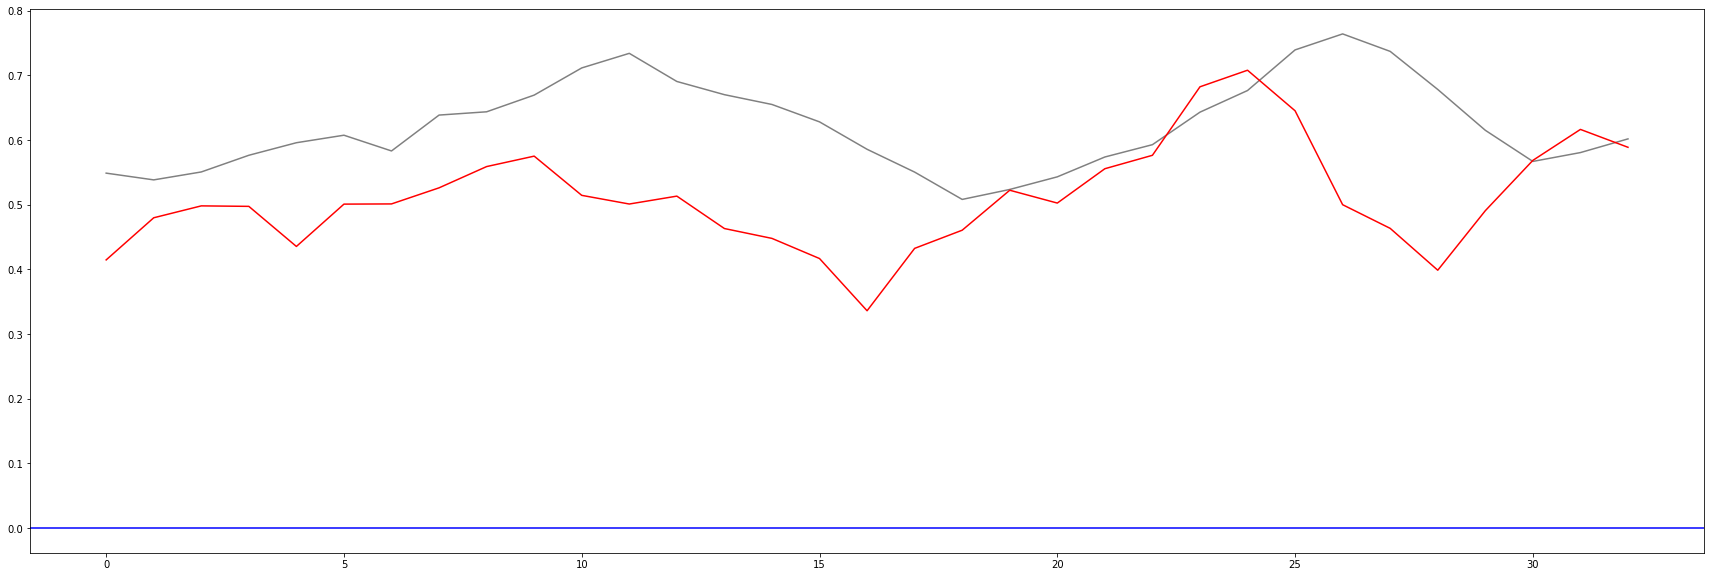

In [185]:
plt.axhline(y=0, color='b', linestyle='-')
plt.plot(test_predicted, color = "gray")
plt.plot(y_test_t, color = "red")
plt.show()

In [160]:
np.sum(test_predicted)

19.159052

In [161]:
np.sum(y_test_t)

16.888995912520528

In [92]:
#x_test_sample = np.array(x_test_sample)
#x_test_sample = np.reshape(x_test_t, (x_test_t.shape[0], x_test_t.shape[1], 1))
#un_pred = lstm_model.predict(x_test_sample)
un_pred = min_max_scaler.inverse_transform(test_predicted)

ValueError: non-broadcastable output operand with shape (33,1) doesn't match the broadcast shape (33,69)

In [573]:
y_t.shape

(412,)

In [813]:
x_test_t.shape

(33, 5, 68)

In [482]:
history.history

{'val_loss': [0.023528301744331008,
  0.021843852887534303,
  0.022176543690323212,
  0.021601778388490596,
  0.02188815275585578,
  0.02134179654941753,
  0.02293489403256948,
  0.02319732240369175,
  0.02243558930623684,
  0.021764867157501606,
  0.02185856829398095,
  0.022187432897814472,
  0.021699735635333388,
  0.022747396927635628,
  0.023140001369800496,
  0.021609076604055946,
  0.022892313135772873,
  0.022117615242231232,
  0.02148834259027613,
  0.022135106234172395,
  0.022042962469194145,
  0.02164761427716907,
  0.022049163577094077,
  0.022283277059087375,
  0.021779333983187956,
  0.022245169726846013,
  0.022575975191355013,
  0.021513939019338783,
  0.021561668451484804,
  0.021567341005915557,
  0.021650568935001502,
  0.021486115657937534,
  0.021381722491988903,
  0.02164614454477487,
  0.02162684965596132,
  0.02145091020751368,
  0.021611920025910485,
  0.021488104957581657,
  0.02154055884326616,
  0.0213551556637047,
  0.021756479039108205,
  0.02186378315686

In [162]:
df_train['sadjclose'].min()

103.7451

In [163]:
df_train['sadjclose'].max()

168.5283

In [164]:
test_predicted*(df_train['sadjclose'].max() - df_train['sadjclose'].min())+df_train['sadjclose'].min()

array([[137.73082],
       [136.17995],
       [136.48126],
       [138.06665],
       [139.42072],
       [140.3912 ],
       [138.58607],
       [142.4955 ],
       [142.56313],
       [143.1036 ],
       [145.9169 ],
       [147.61913],
       [144.53096],
       [143.30165],
       [142.82593],
       [141.43442],
       [138.94817],
       [137.07071],
       [134.54288],
       [136.05046],
       [137.4057 ],
       [139.36942],
       [140.36824],
       [143.81421],
       [145.85995],
       [149.2348 ],
       [150.40503],
       [148.50392],
       [144.08163],
       [140.372  ],
       [137.84007],
       [139.2437 ],
       [141.01428]], dtype=float32)

In [165]:
pred_adj_close_price = (test_predicted*(df_train['sadjclose'].max() - df_train['sadjclose'].min()))+df_train['sadjclose'].min()

In [166]:
(pred_adj_close_price[-1]/ pred_adj_close_price[0]) - 1

array([0.02383971], dtype=float32)

In [167]:
(actual_adj_close[-1]/actual_adj_close[0])-1

0.0863581199297101

In [168]:
np.log((actual_adj_close[-1]/actual_adj_close[0]))

0.08283092767728682

In [169]:
np.log(np.diff(actual_adj_close)+1)

/Users/soupy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


array([ 1.65242077,  0.78463187, -0.05003093,         nan,  1.65614973,
        0.01941039,  0.95996306,  1.14084129,  0.71544669,         nan,
       -2.03485066,  0.58288579,         nan, -4.44816644,         nan,
               nan,  1.98050479,  1.03624031,  1.60999776,         nan,
        1.49054176,  0.85190153,  2.06168482,  0.97851408,         nan,
               nan,         nan,         nan,  1.94017947,  1.79840401,
        1.41098697,         nan])

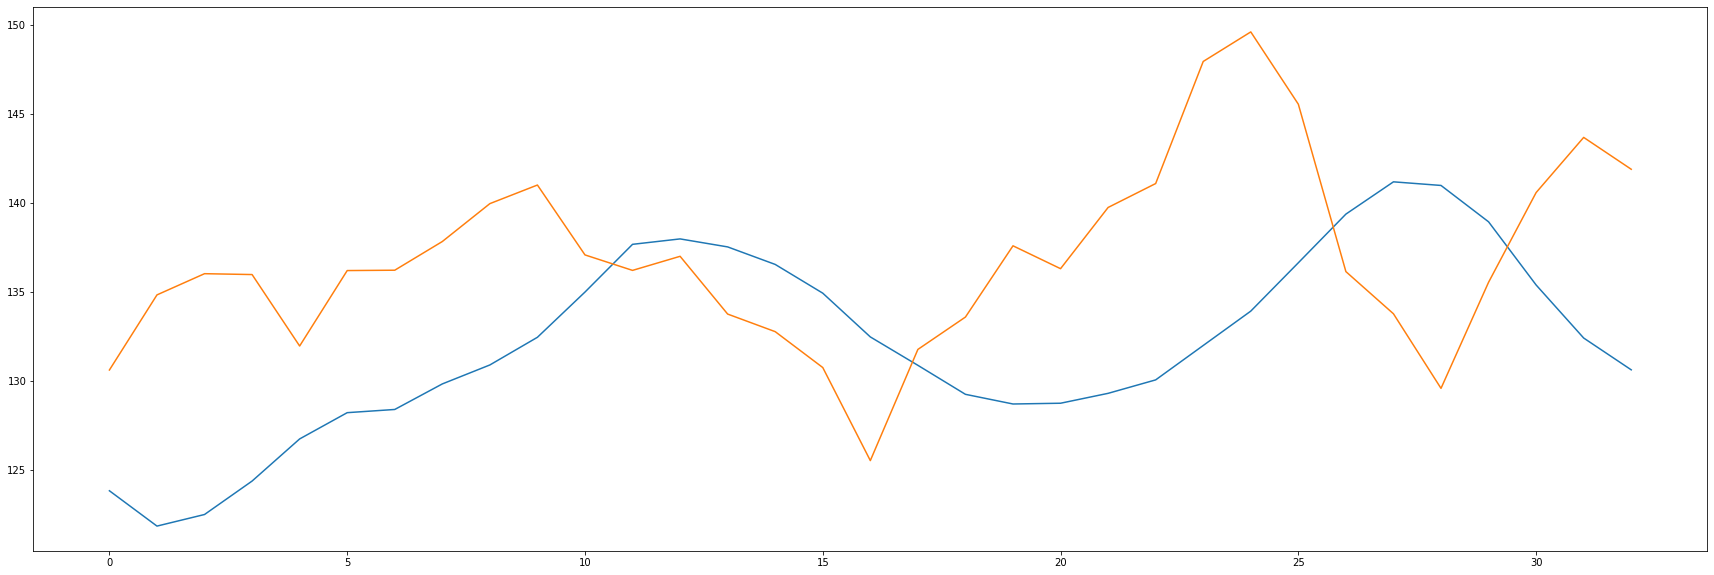

In [135]:
plt.plot(pred_adj_close_price)
plt.plot(y_test_t*(df_train['sadjclose'].max() - df_train['sadjclose'].min())+df_train['sadjclose'].min())
plt.show()

In [137]:
actual_adj_close = y_test_t*(df_train['sadjclose'].max() - df_train['sadjclose'].min())+df_train['sadjclose'].min()

In [131]:
df_test['sadjclose']

date
2018-12-28    113.2728
2019-01-04    117.2700
2019-01-11    119.5486
2019-01-18    129.3484
2019-01-25    129.4739
2019-02-01    130.6015
2019-02-08    134.8211
2019-02-15    136.0127
2019-02-22    135.9639
2019-03-01    131.9494
2019-03-08    136.1885
2019-03-15    136.2081
2019-03-22    137.8197
2019-03-29    139.9491
2019-04-05    140.9942
2019-04-12    137.0676
2019-04-19    136.1983
2019-04-26    136.9895
2019-05-03    133.7441
2019-05-10    132.7558
2019-05-17    130.7395
2019-05-24    125.5111
2019-05-31    131.7575
2019-06-07    133.5761
2019-06-14    137.5789
2019-06-21    136.2941
2019-06-28    139.7336
2019-07-05    141.0777
2019-07-12    147.9369
2019-07-19    149.5974
2019-07-26    145.5352
2019-08-02    136.1300
2019-08-09    133.7600
2019-08-16    129.5700
2019-08-23    135.5300
2019-08-30    140.5700
2019-09-06    143.6700
2019-09-13    141.8800
Name: sadjclose, dtype: float64

In [109]:
x_test[5:,68]

array([0.4145581 , 0.47969227, 0.49808592, 0.49733264, 0.43536442,
       0.50079959, 0.50110214, 0.52597896, 0.55884859, 0.57498086,
       0.51436947, 0.50095086, 0.51316391, 0.46306759, 0.44781209,
       0.41668828, 0.33598217, 0.43240223, 0.46047432, 0.52226194,
       0.50242964, 0.55552211, 0.57626977, 0.68214908, 0.70778072,
       0.64507619, 0.49989658, 0.46331302, 0.39863576, 0.49063492,
       0.56843287, 0.61628478, 0.58865416])

In [104]:
x_test_t.shape

(33, 5, 68)

In [112]:
temp_rescale = np.hstack((x_test[5:,:67], test_predicted))

In [115]:
temp_rescale.shape

(33, 68)

In [114]:
un_pred = min_max_scaler.inverse_transform(temp_rescale)

ValueError: operands could not be broadcast together with shapes (33,68) (69,) (33,68) 

In [170]:
import pickle

In [172]:
pickle.dump(history, open("./adjclose_hist.sav", "wb"))

In [173]:
pickle.dump(lstm_model, open("./adjclose_model.sav", "wb"))